# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

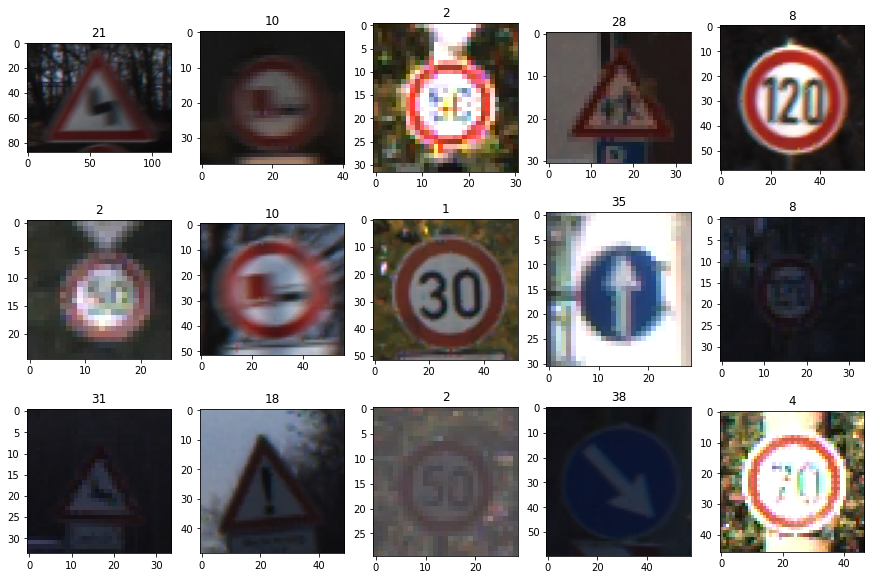

In [2]:
# Load the training labels
root = 'data/' # Path to the dataset location, e.g.
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = data.shape[0]

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [3]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

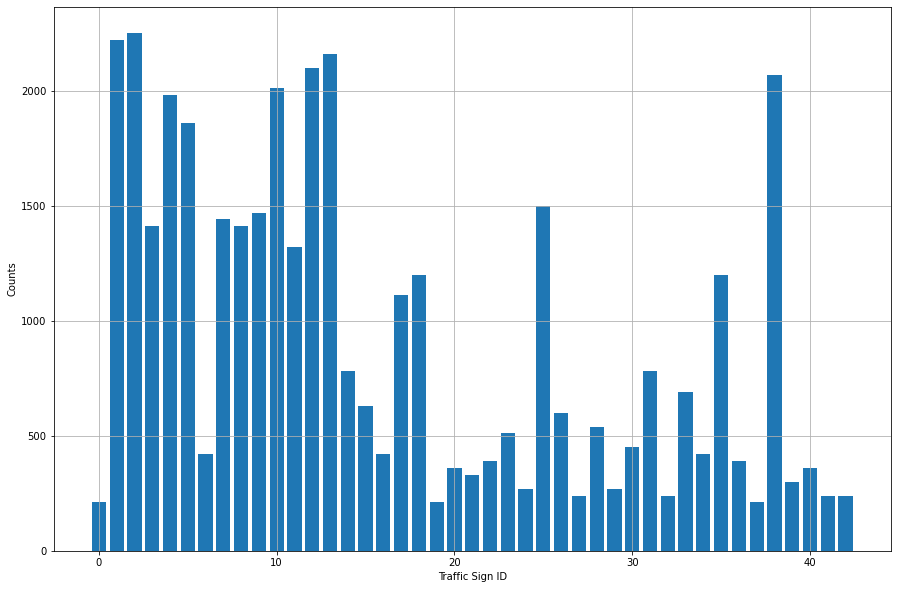

In [4]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

Датасет несбалансированный так как есть существенная разница в кол-ве сэмплов разных классов. Например 2, 3, 12. 13 класс - сильно представлен, в то время как классы 0, 19, 41, 42 - малопредставлены. Для нормализации датасета нужно добавить сэмплы малопредставленных классов